<h1>Exploring Health Datasets for Link-Health to Determine Association between ACP Eligibility and Health Outcomes</h1>

<h2><b>IMPORTANT:</b><br><span style="color:red;">This product uses the Census Bureau Data API but is not endorsed or certified by the Census Bureau.</span></h2>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore') #Turn off warnings

<h2>Cleaning the PLACES Dataset (DO NOT TOUCH)</h2>

places_zcta = pd.read_csv("noah_csv/places_zcta.csv")

places_zcta

In [2]:
ma_acp_adoption = pd.read_csv("noah_csv/MA_ACP_Adoption.csv")
ma_acp_adoption

,City,Adoption Rate,Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17%,2169,376,448
1,Agawam Town,20%,5414,1069,2213
2,Amesbury Town,26%,1821,477,382
3,Arlington,14%,4816,651,925
4,Attleboro,25%,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11%,1975,225,403
73,Winchester,9%,1925,182,370
74,Winthrop Town,11%,4462,499,1586
75,Woburn,17%,4790,826,1069


In [15]:
#Adding clean_zip function
clean_zip = lambda zip: str(zip) if zip > 10000 else f"0{zip}"

<h2>Merging Zip Codes with Towns in the ACP Dataset and PLACES Data</h2>

In [16]:
ma_zips_raw = pd.read_csv("noah_csv/ma_zips.csv")
ma_zips = ma_zips_raw[["Zipcode", "City"]]
ma_zips = ma_zips.rename(columns={"Zipcode":"Zip Code"})
ma_zips

,Zip Code,City
0,1001,Agawam
1,1002,Amherst
2,1003,Amherst
3,1004,Amherst
4,1005,Barre
...,...,...
698,2783,Taunton
699,2790,Westport
700,2791,Westport Point
701,5501,Andover


In [17]:
#Clean Zip Codes
ma_zips["Zip Code"] = ma_zips["Zip Code"].map(clean_zip)
ma_zips

,Zip Code,City
0,01001,Agawam
1,01002,Amherst
2,01003,Amherst
3,01004,Amherst
4,01005,Barre
...,...,...
698,02783,Taunton
699,02790,Westport
700,02791,Westport Point
701,05501,Andover


In [18]:
ma_acp_adoption_zc = ma_acp_adoption.merge(ma_zips, left_on="City", right_on="City")
ma_acp_adoption_zc

,City,Adoption Rate,Eligible Households,Enrolled Households,Eligible Unconnected Households,Zip Code
0,Abington,17%,2169,376,448,02351
1,Arlington,14%,4816,651,925,02474
2,Arlington,14%,4816,651,925,02476
3,Attleboro,25%,6110,1525,1392,02703
4,Belmont,11%,2455,268,471,02478
...,...,...,...,...,...,...
206,Worcester,60%,42567,25455,14501,01614
207,Worcester,60%,42567,25455,14501,01615
208,Worcester,60%,42567,25455,14501,01653
209,Worcester,60%,42567,25455,14501,01654


The problem here is that we have the ACP data on a town level from the superhighway dataset, but the PLACES data is on a ZCTA level meaning we would somehow need to aggregate all the data from different zip codes in the same town in the PLACES dataset, but by population not percent so it is a weighted average

My thoughts:
- Add Town to the PLACES dataset, merging by zip code
- Find a dataset that provides population by ZCTA and merge with PLACES dataset on Zip Code
- Aggregate percent data in the PLACES dataset by population to create a weighted average so the PLACES and ACP datasets would have the same levels of granularity
    - This would certainly screw up the confidence level piece so we would have to drop that
    
Option 2 is to not worry about population and just assume the same adoption rate per different ZCTAs in the same city (like assuming both area 01614 and 01615 separately have a 60% adoption rate) which would likely be a major oversight

<h2>Exporting MA places data separately</h2>
<h4>The full PLACES dataset was too large to upload to GitHub so I exported a separate places_ma dataset which is now in the noah_csv folder</h4>

In [32]:
places_ma = pd.read_csv("noah_csv/places_ma.csv")
places_ma = places_ma.drop(columns=["Unnamed: 0"])
places_ma

,Year,Zip Code,Category,Measure,Data_Value_Type,Data_Value,Confidence Interval
0,2020,1005,Health Outcomes,Arthritis among adults aged >=18 years,Crude prevalence,27.2,"(25.8, 28.6)"
1,2020,1007,Health Outcomes,Stroke among adults aged >=18 years,Crude prevalence,2.1,"(1.9, 2.4)"
2,2020,1008,Health Outcomes,Obesity among adults aged >=18 years,Crude prevalence,29.2,"(27.9, 30.5)"
3,2020,1009,Health Outcomes,Obesity among adults aged >=18 years,Crude prevalence,29.7,"(28.0, 31.5)"
4,2020,1026,Health Outcomes,Chronic kidney disease among adults aged >=18 ...,Crude prevalence,2.8,"(2.6, 3.0)"
...,...,...,...,...,...,...,...
15939,2020,1057,Health Risk Behaviors,Current smoking among adults aged >=18 years,Crude prevalence,15.4,"(13.5, 17.2)"
15940,2020,1833,Health Outcomes,All teeth lost among adults aged >=65 years,Crude prevalence,7.5,"(4.8, 10.6)"
15941,2019,1830,Prevention,Cholesterol screening among adults aged >=18 y...,Crude prevalence,89.4,"(88.9, 90.0)"
15942,2020,1245,Health Status,Fair or poor self-rated health status among ad...,Crude prevalence,10.9,"(8.9, 13.2)"


In [33]:
#Fix Zip Codes
places_ma["Zip Code"] = places_ma["Zip Code"].map(clean_zip)
places_ma

,Year,Zip Code,Category,Measure,Data_Value_Type,Data_Value,Confidence Interval
0,2020,01005,Health Outcomes,Arthritis among adults aged >=18 years,Crude prevalence,27.2,"(25.8, 28.6)"
1,2020,01007,Health Outcomes,Stroke among adults aged >=18 years,Crude prevalence,2.1,"(1.9, 2.4)"
2,2020,01008,Health Outcomes,Obesity among adults aged >=18 years,Crude prevalence,29.2,"(27.9, 30.5)"
3,2020,01009,Health Outcomes,Obesity among adults aged >=18 years,Crude prevalence,29.7,"(28.0, 31.5)"
4,2020,01026,Health Outcomes,Chronic kidney disease among adults aged >=18 ...,Crude prevalence,2.8,"(2.6, 3.0)"
...,...,...,...,...,...,...,...
15939,2020,01057,Health Risk Behaviors,Current smoking among adults aged >=18 years,Crude prevalence,15.4,"(13.5, 17.2)"
15940,2020,01833,Health Outcomes,All teeth lost among adults aged >=65 years,Crude prevalence,7.5,"(4.8, 10.6)"
15941,2019,01830,Prevention,Cholesterol screening among adults aged >=18 y...,Crude prevalence,89.4,"(88.9, 90.0)"
15942,2020,01245,Health Status,Fair or poor self-rated health status among ad...,Crude prevalence,10.9,"(8.9, 13.2)"


<h2>Importing ZCTA to Population dataset to merge with places_ma</h2>

In [34]:
zcta_to_pop_ma = pd.read_csv("noah_csv/zcta_to_population_ma.csv")
zcta_to_pop_ma

,Rank,ZCTA,Population
0,1,2301,"68,571"
1,2,2148,"65,386"
2,3,2155,"62,996"
3,4,2360,"60,793"
4,5,2151,"60,736"
...,...,...,...
529,530,1380,47
530,531,2713,34
531,532,1525,31
532,533 TIE,2553,30


In [35]:
#Clean the ZCTA and Population Columns
zcta_to_pop_ma["ZCTA"] = zcta_to_pop_ma["ZCTA"].map(clean_zip)
zcta_to_pop_ma["Population"] = zcta_to_pop_ma["Population"].str.replace(",", "").astype(int)
zcta_to_pop_ma = zcta_to_pop_ma.drop(columns=["Rank"])
zcta_to_pop_ma

,ZCTA,Population
0,02301,68571
1,02148,65386
2,02155,62996
3,02360,60793
4,02151,60736
...,...,...
529,01380,47
530,02713,34
531,01525,31
532,02553,30


<h2>Merging zcta_to_pop_ma with places_ma</h2>
<h4>This will allow us to take a weighted average of the statistics in the places_ma dataset</h4>

In [36]:
places_ma_pop = places_ma.merge(zcta_to_pop_ma, left_on="Zip Code", right_on="ZCTA")
places_ma_pop

,Year,Zip Code,Category,Measure,Data_Value_Type,Data_Value,Confidence Interval,ZCTA,Population
0,2020,01005,Health Outcomes,Arthritis among adults aged >=18 years,Crude prevalence,27.2,"(25.8, 28.6)",01005,4947
1,2020,01005,Prevention,Older adult women aged >=65 years who are up t...,Crude prevalence,47.0,"(41.4, 52.4)",01005,4947
2,2020,01005,Health Outcomes,Stroke among adults aged >=18 years,Crude prevalence,2.5,"(2.2, 2.9)",01005,4947
3,2020,01005,Prevention,Mammography use among women aged 50-74 years,Crude prevalence,82.2,"(78.8, 85.5)",01005,4947
4,2020,01005,Health Outcomes,Current asthma among adults aged >=18 years,Crude prevalence,10.6,"(10.0, 11.1)",01005,4947
...,...,...,...,...,...,...,...,...,...
15854,2020,01902,Health Outcomes,Stroke among adults aged >=18 years,Crude prevalence,3.2,"(3.1, 3.4)",01902,51008
15855,2020,01902,Health Outcomes,All teeth lost among adults aged >=65 years,Crude prevalence,19.7,"(17.5, 22.0)",01902,51008
15856,2020,01902,Health Status,Mental health not good for >=14 days among adu...,Crude prevalence,16.6,"(16.3, 16.9)",01902,51008
15857,2020,01902,Health Outcomes,Arthritis among adults aged >=18 years,Crude prevalence,23.9,"(23.6, 24.2)",01902,51008


In [37]:
#Isolating one measure to intiallly use (Lack of Health Insurance)
places_ma_pop_health_insurance = places_ma_pop[places_ma_pop["Measure"] == 'Current lack of health insurance among adults aged 18-64 years']
places_ma_pop_health_insurance = places_ma_pop_health_insurance.drop(columns=["Measure", "Category", "ZCTA"])
places_ma_pop_health_insurance

,Year,Zip Code,Data_Value_Type,Data_Value,Confidence Interval,Population
22,2020,01005,Crude prevalence,5.9,"(4.6, 7.4)",4947
38,2020,01007,Crude prevalence,5.2,"(4.3, 6.2)",15304
67,2020,01008,Crude prevalence,5.8,"(4.6, 7.4)",1171
111,2020,01009,Crude prevalence,6.4,"(5.0, 7.9)",800
138,2020,01026,Crude prevalence,5.4,"(4.1, 6.9)",1071
...,...,...,...,...,...,...
15730,2020,01431,Crude prevalence,5.6,"(4.3, 7.1)",3189
15750,2020,02333,Crude prevalence,5.9,"(5.1, 6.7)",14403
15778,2020,01930,Crude prevalence,5.9,"(5.4, 6.4)",29814
15811,2020,01801,Crude prevalence,5.8,"(5.3, 6.4)",40967


In [38]:
#Adding town by ZCTA
places_ma_pop_health_insurance = places_ma_pop_health_insurance.merge(ma_zips, left_on="Zip Code", right_on="Zip Code")
places_ma_pop_health_insurance

,Year,Zip Code,Data_Value_Type,Data_Value,Confidence Interval,Population,City
0,2020,01005,Crude prevalence,5.9,"(4.6, 7.4)",4947,Barre
1,2020,01007,Crude prevalence,5.2,"(4.3, 6.2)",15304,Belchertown
2,2020,01008,Crude prevalence,5.8,"(4.6, 7.4)",1171,Blandford
3,2020,01009,Crude prevalence,6.4,"(5.0, 7.9)",800,Bondsville
4,2020,01026,Crude prevalence,5.4,"(4.1, 6.9)",1071,Cummington
...,...,...,...,...,...,...,...
524,2020,01431,Crude prevalence,5.6,"(4.3, 7.1)",3189,Ashby
525,2020,02333,Crude prevalence,5.9,"(5.1, 6.7)",14403,East Bridgewater
526,2020,01930,Crude prevalence,5.9,"(5.4, 6.4)",29814,Gloucester
527,2020,01801,Crude prevalence,5.8,"(5.3, 6.4)",40967,Woburn


In [49]:
# Calculate the weighted average function
def weighted_average(group):
    value_sum = (group['Data_Value'] * group['Population']).sum()
    population_sum = group['Population'].sum()
    return value_sum / population_sum

# Apply the weighted average calculation to each town
aggregated_health_insurance = places_ma_pop_health_insurance.groupby('City').apply(weighted_average).reset_index()
aggregated_health_insurance.columns = ["City", "Weighted Average of Lack of Health Insurance (%)"]
aggregated_health_insurance

,City,Weighted Average of Lack of Health Insurance (%)
0,Abington,5.800000
1,Acton,3.900000
2,Acushnet,6.900000
3,Adams,7.100000
4,Agawam,6.200000
...,...,...
453,Worcester,10.344102
454,Woronoco,6.800000
455,Worthington,5.300000
456,Wrentham,4.400000


In [58]:
"""Test the weighted average worked correctly"""
def test_weighted_average():
    worcester = places_ma_pop_health_insurance[places_ma_pop_health_insurance["City"] == "Worcester"]
    total_pop = sum(worcester["Population"])
    raw_nums = worcester["Population"] * (worcester["Data_Value"]/100.0)
    weighted_avg = 100.0 * (sum(raw_nums)/total_pop)
    worcester_stat = aggregated_health_insurance[aggregated_health_insurance["City"] == "Worcester"]["Weighted Average of Lack of Health Insurance (%)"].values[0]
    assert weighted_avg - worcester_stat < 0.001

test_weighted_average()

In [59]:
ma_acp_adoption

,City,Adoption Rate,Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17%,2169,376,448
1,Agawam Town,20%,5414,1069,2213
2,Amesbury Town,26%,1821,477,382
3,Arlington,14%,4816,651,925
4,Attleboro,25%,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11%,1975,225,403
73,Winchester,9%,1925,182,370
74,Winthrop Town,11%,4462,499,1586
75,Woburn,17%,4790,826,1069


In [60]:
#Clean adoption rate column of ma_acp_adoption
ma_acp_adoption["Adoption Rate"] = ma_acp_adoption["Adoption Rate"].map(
    lambda p: int(p[0:-1])
)
ma_acp_adoption

,City,Adoption Rate,Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17,2169,376,448
1,Agawam Town,20,5414,1069,2213
2,Amesbury Town,26,1821,477,382
3,Arlington,14,4816,651,925
4,Attleboro,25,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11,1975,225,403
73,Winchester,9,1925,182,370
74,Winthrop Town,11,4462,499,1586
75,Woburn,17,4790,826,1069


In [65]:
#Get rid of the word "Town" in City column
ma_acp_adoption["City"] = ma_acp_adoption['City'].str.replace(' Town$', '')
ma_acp_adoption

,City,Adoption Rate (%),Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17,2169,376,448
1,Agawam,20,5414,1069,2213
2,Amesbury,26,1821,477,382
3,Arlington,14,4816,651,925
4,Attleboro,25,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11,1975,225,403
73,Winchester,9,1925,182,370
74,Winthrop,11,4462,499,1586
75,Woburn,17,4790,826,1069


In [62]:
ma_acp_adoption = ma_acp_adoption.rename(columns={"Adoption Rate":"Adoption Rate (%)"})
ma_acp_adoption

,City,Adoption Rate (%),Eligible Households,Enrolled Households,Eligible Unconnected Households
0,Abington,17,2169,376,448
1,Agawam Town,20,5414,1069,2213
2,Amesbury Town,26,1821,477,382
3,Arlington,14,4816,651,925
4,Attleboro,25,6110,1525,1392
...,...,...,...,...,...
72,Wilmington,11,1975,225,403
73,Winchester,9,1925,182,370
74,Winthrop Town,11,4462,499,1586
75,Woburn,17,4790,826,1069


In [67]:
#Trim down aggregated_health_insurance to the rows which contain towns from the superhighway dataset
health_insurance_acp = aggregated_health_insurance[aggregated_health_insurance["City"].isin(list(ma_acp_adoption["City"]))]
health_insurance_acp

,City,Weighted Average of Lack of Health Insurance (%)
0,Abington,5.800000
4,Agawam,6.200000
6,Amesbury,5.600000
9,Arlington,4.160871
17,Attleboro,7.200000
...,...,...
446,Wilmington,5.200000
448,Winchester,3.500000
450,Winthrop,6.100000
451,Woburn,5.800000


In [74]:
#Merge datasets
health_insurance_vs_acp_adoption = health_insurance_acp.merge(ma_acp_adoption[["City", "Adoption Rate (%)"]], left_on="City", right_on="City")
health_insurance_vs_acp_adoption = health_insurance_vs_acp_adoption.rename(columns={"Weighted Average of Lack of Health Insurance (%)": "Estimated Lack of Health Insurance (%)"})

<h2>Plotting the ACP Adoption Percent by Town vs. the Est. Percent of Individuals with a Lack of Health Insurance</h2>

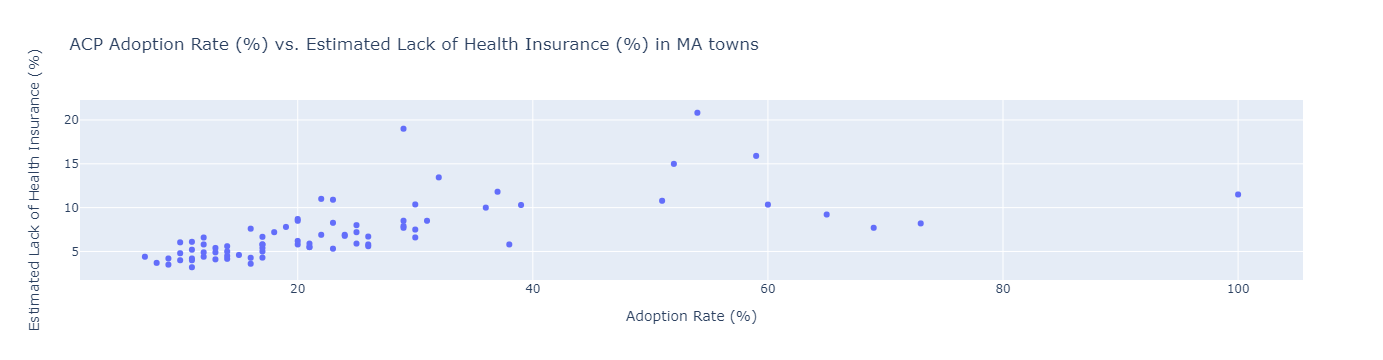

In [78]:
import plotly.express as px

#Plot ACP adoption percent by town vs. Estimated Percent of Individuals with a Lack of Health Insurance
fig = px.scatter(health_insurance_vs_acp_adoption, 
                 x="Adoption Rate (%)", 
                 y="Estimated Lack of Health Insurance (%)",
                 title="ACP Adoption Rate (%) vs. Estimated Lack of Health Insurance (%) in MA towns"
                )

fig.show()